In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [61]:
df = pd.read_excel("superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [62]:
df.shape

(9994, 21)

In [63]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2020-04-30 00:07:03.614168576,2020-05-03 23:06:58.571142656,55245.233297,229.858001,3.789574,0.156203,28.656896
min,1.000000,2018-01-03 00:00:00,2018-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2019-05-23 00:00:00,2019-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2020-06-26 00:00:00,2020-06-29 00:00:00,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2021-05-14 00:00:00,2021-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2021-12-30 00:00:00,2022-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32038.715955,623.245101,2.225110,0.206452,234.260108


In [64]:
df.drop(columns=['Row ID', 'Customer ID', 'Product ID'], inplace=True)

In [65]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [66]:
df.isnull().sum()

Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [67]:
df.drop(columns=['Postal Code'],inplace=True)

In [68]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Profit_Margin'] = df['Profit'] / df['Sales']
df['Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

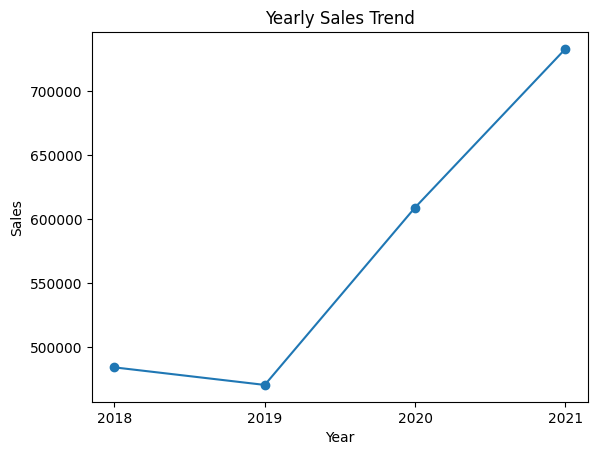

In [69]:
yearly_sales.index=yearly_sales.index.astype(str)
yearly_sales = df.groupby('Year')['Sales'].sum()
plt.plot(yearly_sales.index,yearly_sales.values,marker='o')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title("Yearly Sales Trend")
plt.xticks(yearly_sales.index)
plt.show()

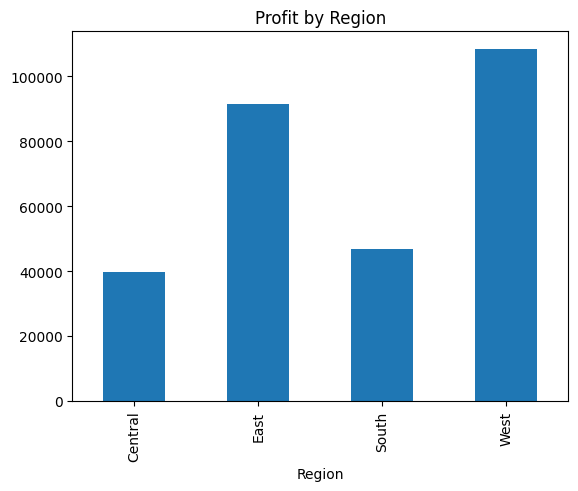

In [70]:
df.groupby('Region')['Profit'].sum().plot(kind='bar')
plt.title("Profit by Region")
plt.show()

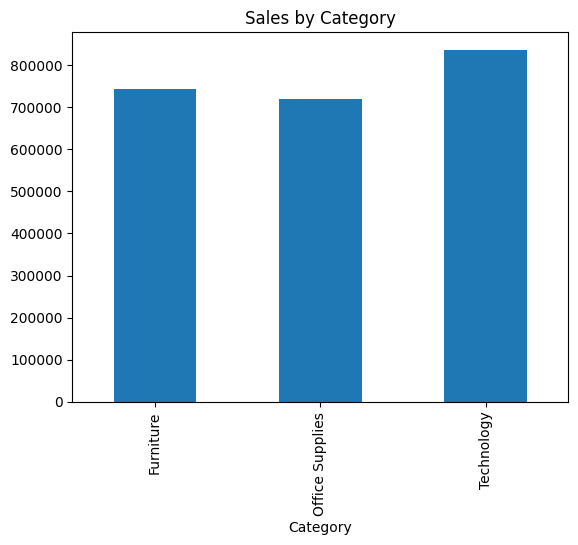

In [71]:
df.groupby('Category')['Sales'].sum().plot(kind='bar')
plt.title("Sales by Category")
plt.show()

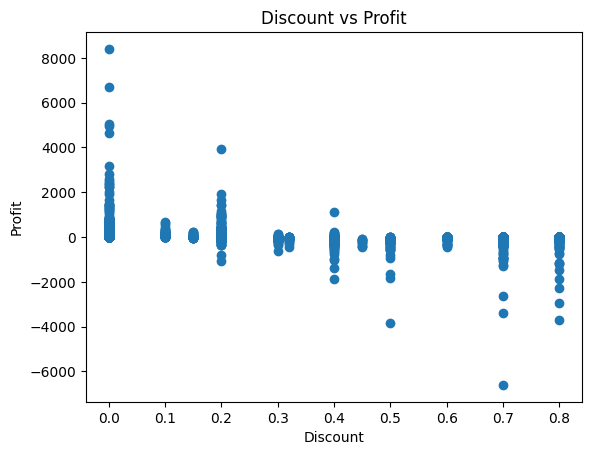

In [72]:
plt.scatter(df['Discount'], df['Profit'])
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Discount vs Profit")
plt.show()

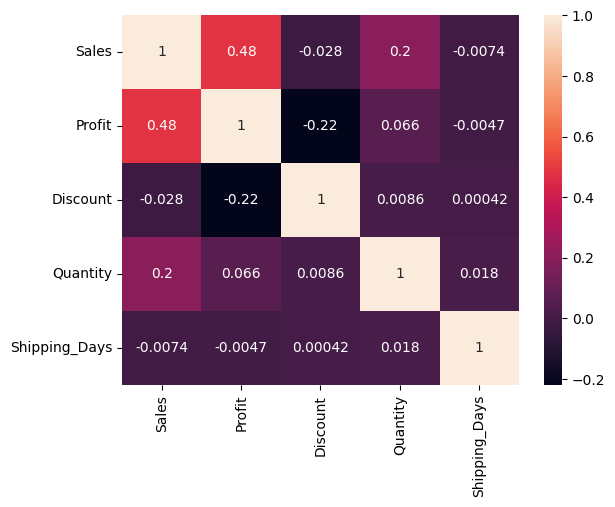

In [73]:
sns.heatmap(df[['Sales','Profit','Discount','Quantity','Shipping_Days']].corr(), annot=True)
plt.show()

statistical anlaysis

T-Test

In [74]:
high = df[df['Discount'] > 0.2]['Profit']
low = df[df['Discount'] <= 0.2]['Profit']
t_stat, p_value = stats.ttest_ind(high, low)
print(p_value)

5.092886028895891e-106


we tested T-Test to check whether the discount significantly impact the profit or not

anova test

In [75]:
groups = [df[df['Category']==c]['Profit'] 
          for c in df['Category'].unique()]
f_stat, p_value = stats.f_oneway(*groups)
print(p_value)

3.46991834622419e-24


we compared category with profit to check whether category impact the profit or not

Chi square test

In [76]:
table = pd.crosstab(df['Segment'], df['Category'])
chi2, p_value, _, _ = stats.chi2_contingency(table)
print(p_value)

0.8334835825190556


we checked relationship between customer segment and purchase behavior

T-test

In [77]:
mean = df['Sales'].mean()
target = df['Sales'].median()
std = df['Sales'].std()
n = len(df)

z = (mean-target)/(std/np.sqrt(n))
p = stats.norm.sf(abs(z))*2

print("p-value:", p)

p-value: 4.276452115543732e-174


we tested if average sales meet business targets

Outliers handling

In [78]:
num_cols = ['Sales', 'Profit', 'Quantity', 'Discount']

detecting the outliers

In [79]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"{column} outliers:", len(outliers))
for col in num_cols:
    detect_outliers(df, col)

Sales outliers: 1167
Profit outliers: 1881
Quantity outliers: 170
Discount outliers: 856


visulizing the outliers

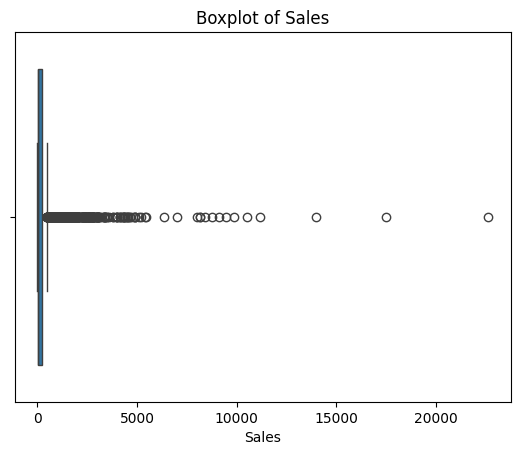

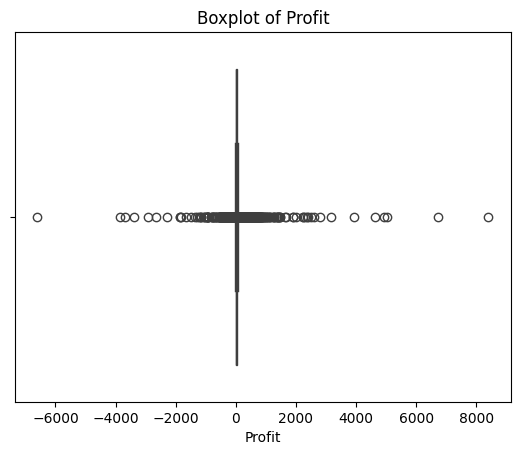

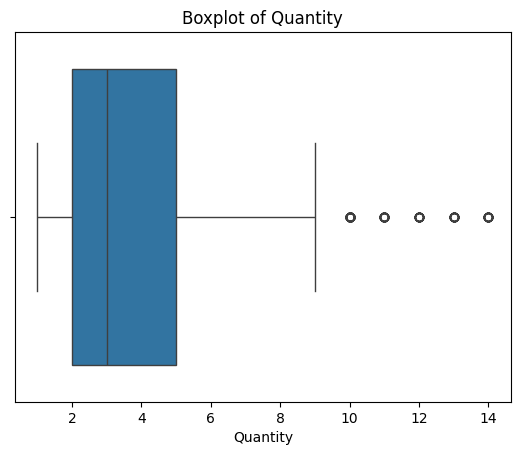

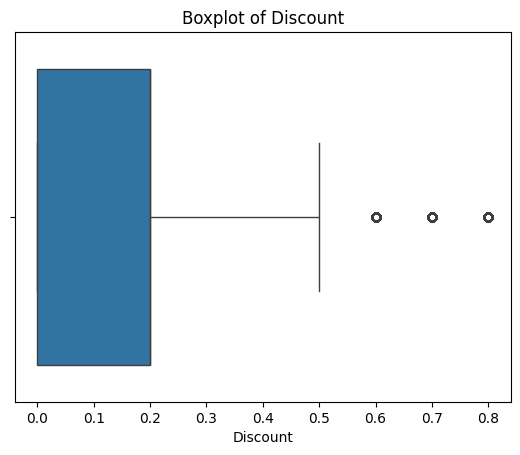

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


filling the outliers by limiting extreame values

In [81]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower, upper)
    return df

for col in num_cols:
    df = cap_outliers(df, col)

rechecking the outliers

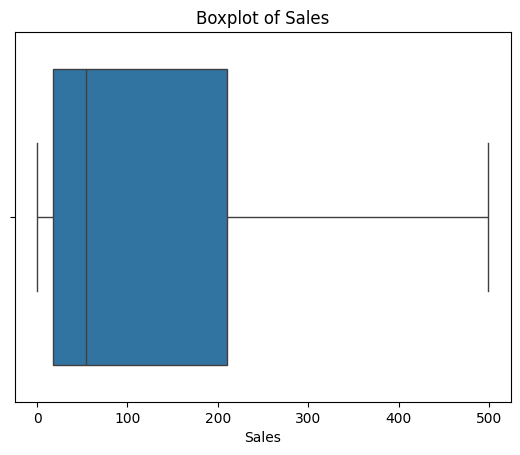

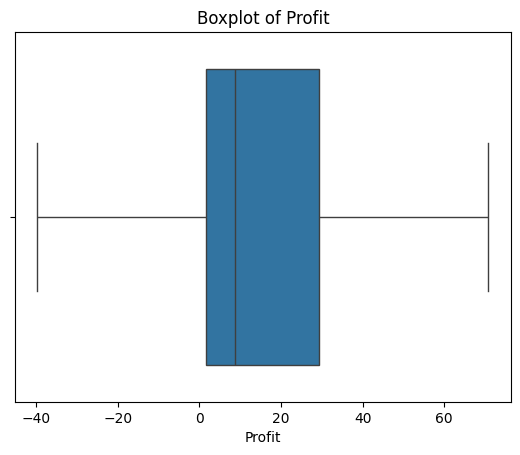

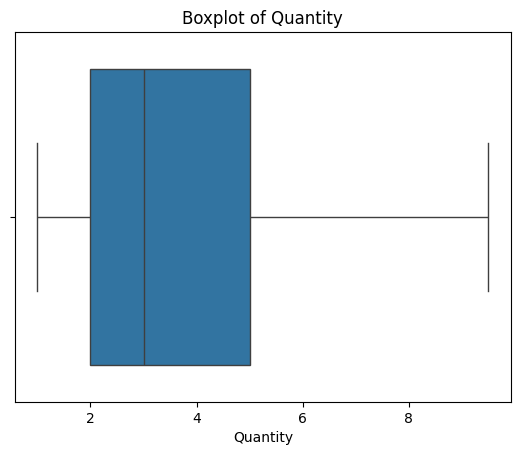

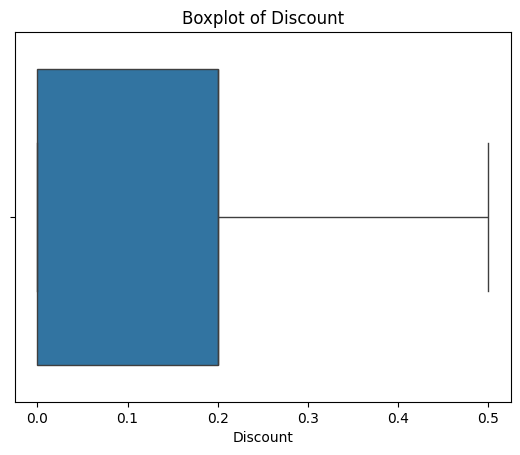

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


anova test for comparing ship mode and profit

In [83]:
groups = [df[df['Ship Mode'] == mode]['Profit']
          for mode in df['Ship Mode'].unique()]
f_stat, p_value = stats.f_oneway(*groups)
print("F-stat:", f_stat)
print("p-value:", p_value)

F-stat: 3.008143190738174
p-value: 0.029015516837166074


In [84]:
table = pd.crosstab(df['Ship Mode'], df['Category'])

chi2, p, dof, expected =stats.chi2_contingency(table)

print("Chi2:", chi2)
print("p-value:", p)

Chi2: 3.5789107440384584
p-value: 0.733443084824782


Chi-square test was performed to analyze the association between Ship Mode and Product Category. The results indicated whether shipping method significantly influences category distribution.

In [85]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country/Region,City,State,Region,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Profit_Margin,Shipping_Days
0,CA-2020-152156,2020-11-08,2020-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,...,Bookcases,Bush Somerset Collection Bookcase,261.960,2.0,0.00,41.913600,2020,11,0.1600,3
1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",498.930,3.0,0.00,70.816875,2020,11,0.3000,3
2,CA-2020-138688,2020-06-12,2020-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2.0,0.00,6.871400,2020,6,0.4700,4
3,US-2019-108966,2019-10-11,2019-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,...,Tables,Bretford CR4500 Series Slim Rectangular Table,498.930,5.0,0.45,-39.724125,2019,10,-0.4000,7
4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,...,Storage,Eldon Fold 'N Roll Cart System,22.368,2.0,0.20,2.516400,2019,10,0.1125,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2018-110422,2018-01-21,2018-01-23,Second Class,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South,...,Furnishings,Ultra Door Pull Handle,25.248,3.0,0.20,4.102800,2018,1,0.1625,2
9990,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,...,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2.0,0.00,15.633200,2021,2,0.1700,5
9991,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,...,Phones,Aastra 57i VoIP phone,258.576,2.0,0.20,19.393200,2021,2,0.0750,5
9992,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,...,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4.0,0.00,13.320000,2021,2,0.4500,5


In [86]:
df.to_csv('cleaned superstore sales',index=False)